In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

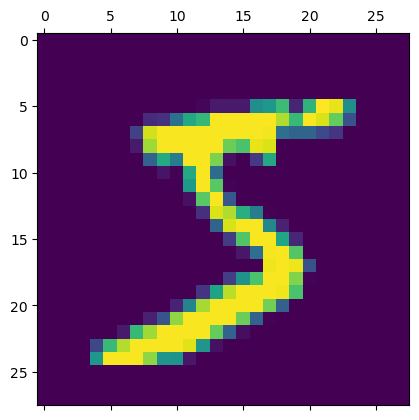

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
from pickletools import optimize


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-18 02:49:58.342626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-18 02:49:58.343183: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2022-10-18 02:49:58.754167: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-18 02:49:58.906648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4756 - accuracy: 0.8744
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3043 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2664 - accuracy: 0.9264


In [14]:
model.evaluate(X_test_flattened, y_test)

 40/313 [==>...........................] - ETA: 1s - loss: 0.3078 - accuracy: 0.9070

2022-10-18 02:51:36.468123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.2703 - accuracy: 0.9233


[0.27025625109672546, 0.92330002784729]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

106/313 [=========>....................] - ETA: 0s

2022-10-18 02:52:10.625536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


array([2.3276785e-02, 2.9679242e-07, 3.5501245e-02, 9.4866252e-01,
       3.4724751e-03, 1.0708024e-01, 1.3381350e-06, 9.9980527e-01,
       9.7520851e-02, 6.1295736e-01], dtype=float32)

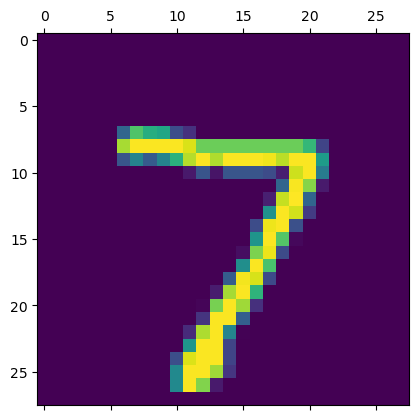

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    2,    4,    2,    8,    0],
       [   6,   10,  901,   29,   10,    4,   12,   12,   45,    3],
       [   1,    0,   16,  933,    1,   17,    3,   14,   18,    7],
       [   1,    1,    3,    2,  927,    0,   11,    3,   10,   24],
       [   9,    3,    1,   47,   12,  756,   19,    9,   30,    6],
       [  10,    3,    4,    2,    8,    7,  919,    2,    3,    0],
       [   1,    5,   19,    6,    8,    0,    0,  961,    3,   25],
       [   6,    9,    6,   24,   10,   25,   10,   13,  864,    7],
       [  11,    7,    1,    9,   44,    7,    0,   31,    4,  895]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

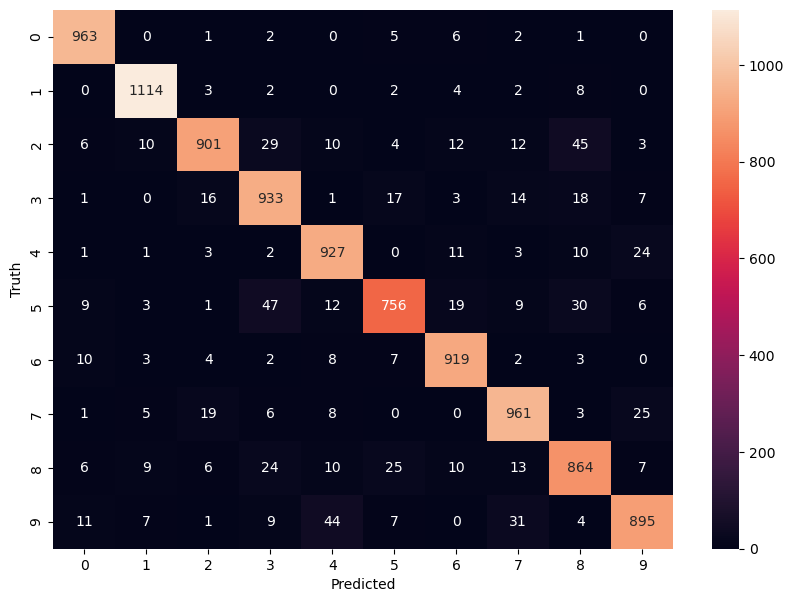

In [22]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
   8/1875 [..............................] - ETA: 14s - loss: 2.1883 - accuracy: 0.2109 

2022-10-18 02:57:58.973975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2784 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1269 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0874 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0658 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0504 - accuracy: 0.9843


In [24]:
model.evaluate(X_test_flattened, y_test)

 20/313 [>.............................] - ETA: 1s - loss: 0.0613 - accuracy: 0.9797

2022-10-18 02:59:06.319598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.0768 - accuracy: 0.9758


[0.07677369564771652, 0.9758000373840332]

 48/313 [===>..........................] - ETA: 0s

2022-10-18 03:02:34.231855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

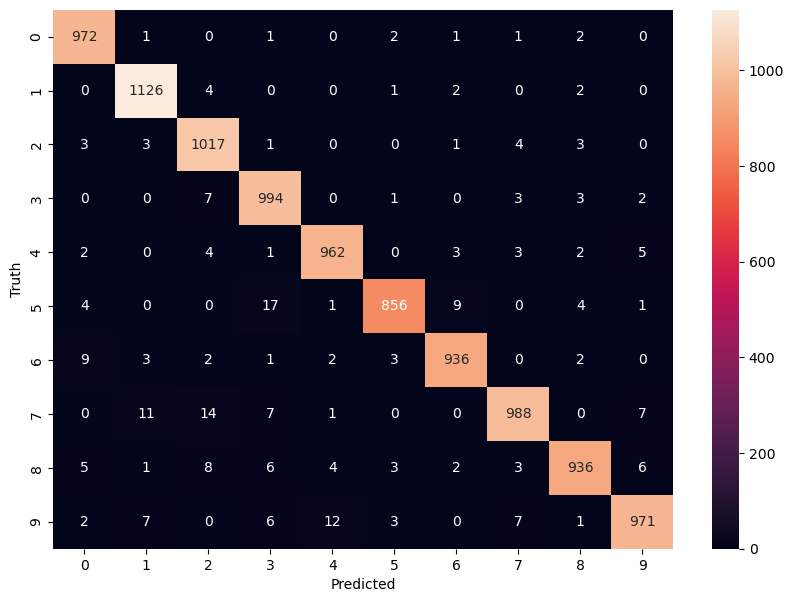

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
  17/1875 [..............................] - ETA: 12s - loss: 1.9180 - accuracy: 0.4246

2022-10-18 03:05:41.927852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2788 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1280 - accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0890 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0525 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0424 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0290 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0242 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0199 - accurac

In [29]:
model.evaluate(X_test, y_test)

 21/313 [=>............................] - ETA: 1s - loss: 0.0524 - accuracy: 0.9866

2022-10-18 03:08:20.636614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0810 - accuracy: 0.9780


[0.08103146404027939, 0.9780000448226929]